<a href="https://colab.research.google.com/github/shayanvafaei/Stock-Prediction/blob/main/Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Installing Necessary Packages
!pip install -q yahoo_fin
!pip install -q yfinance

In [10]:
#Import Packages
import datetime
import feedparser
import ftplib
import io
import json
import pandas
import requests
import requests_html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import datetime
import yahoo_fin.stock_info as si
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
yf.pdr_override()



In [34]:
#Import Packages
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yahoo_fin.stock_info as si

from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader.data import DataReader
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
yf.pdr_override()

In [35]:
# Set A
stock_list = ['2222.SR', 'XOM', 'CVX', 'SHEL']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

def get_stock_data(stock, start_date, end_date):
    """
    Retrieves stock data for a list of companies from Yahoo Finance API.
    Returns: stock_data
    """
    stock_data = pd.DataFrame()
    stock_df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
    stock_df['company_name'] = stock
    stock_data = pd.concat([stock_data, stock_df], axis=0)
    return stock_data

#Visualizing Stock Data of The Exxon Mobil Stock
get_stock_data('XOM',start, end)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-12,83.779999,85.050003,82.860001,84.500000,81.675888,21013000,XOM
2022-07-13,83.379997,86.309998,83.300003,84.839996,82.004517,19928600,XOM
2022-07-14,81.849998,83.309998,80.690002,83.139999,80.361336,26343000,XOM
2022-07-15,84.800003,84.879997,82.900002,84.540001,81.714546,17243700,XOM
2022-07-18,86.580002,87.940002,85.750000,86.099998,83.222412,19395800,XOM
...,...,...,...,...,...,...,...
2023-07-06,105.089996,105.720001,102.430000,102.919998,102.919998,17961400,XOM
2023-07-07,101.919998,104.000000,101.559998,103.160004,103.160004,21926600,XOM
2023-07-10,102.970001,104.750000,102.750000,104.690002,104.690002,14877600,XOM


In [36]:
#Visualizing Fundamental Data of The Exxon Mobil Stock

def fund_data(stock):
  fund_data = si.get_quote_table(stock, dict_result=False)
  return fund_data

fund_data('XOM')

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


,attribute,value
0,1y Target Est,125.3
1,52 Week Range,80.69 - 119.92
2,Ask,106.43 x 800
3,Avg. Volume,15132619.0
4,Beta (5Y Monthly),1.08
5,Bid,106.42 x 800
6,Day's Range,106.14 - 107.65
7,EPS (TTM),14.59
8,Earnings Date,"Jul 27, 2023 - Jul 31, 2023"
9,Ex-Dividend Date,"May 15, 2023"


In [37]:
#Visualizing the Adj Close Price of The Stocks
adjclosing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']
stock_returns = adjclosing_df.pct_change()
stock_returns.head()

[*********************100%***********************]  4 of 4 completed


,2222.SR,CVX,SHEL,XOM
Date,,,,
2022-07-12,NaN,NaN,NaN,NaN
2022-07-13,NaN,-0.006694,0.001887,0.004024
2022-07-14,-0.010914,-0.014856,-0.034324,-0.020038
2022-07-15,0.000000,0.012579,0.028825,0.016839
2022-07-17,0.019310,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Correlation of stock closing price')

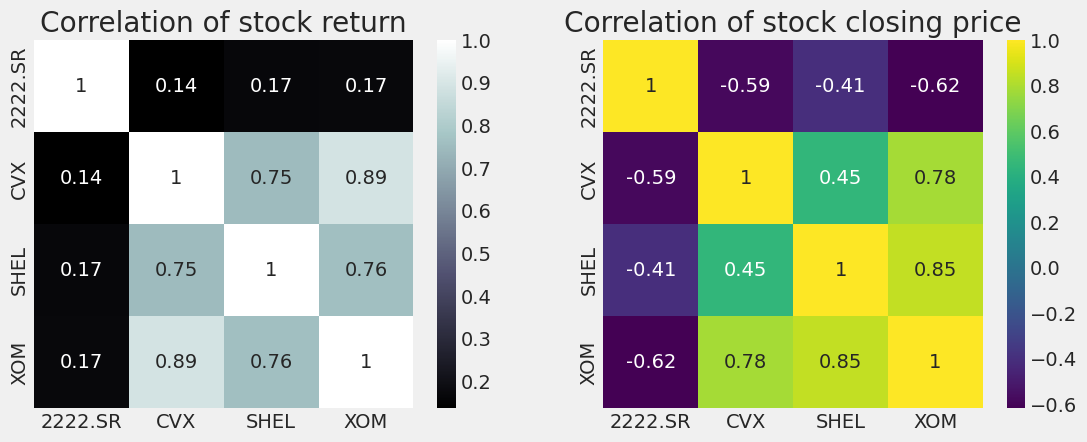

In [38]:
#Visualizing The correlation of stock returns and adk closing price
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_returns.corr(), annot=True, cmap='bone')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(adjclosing_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation of stock closing price')

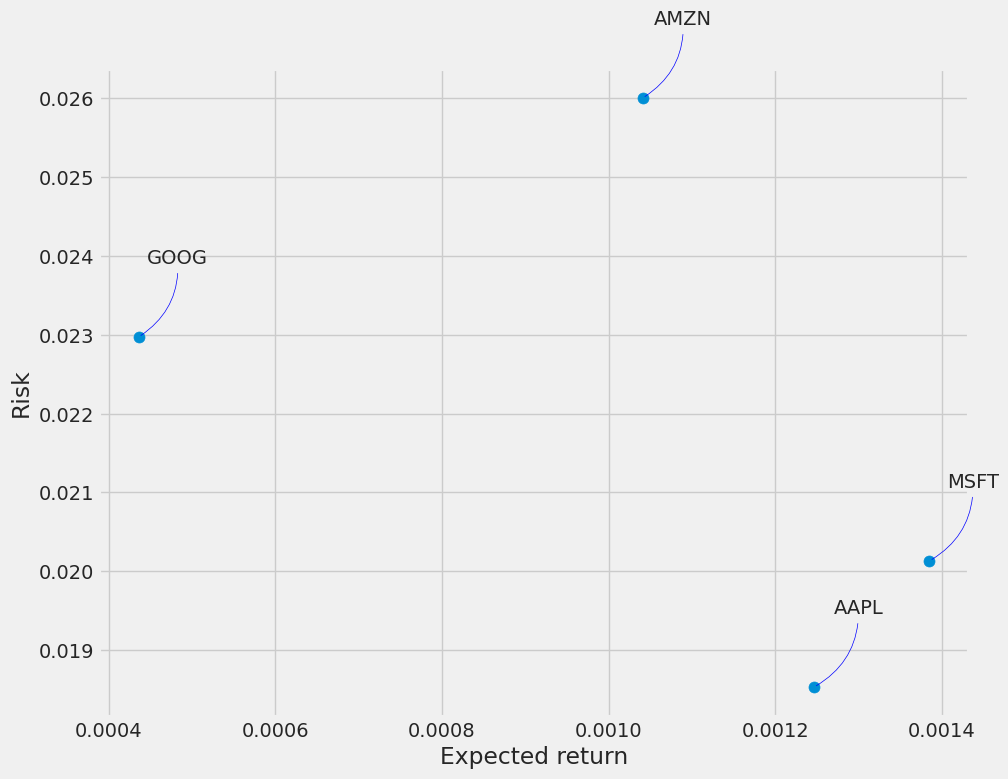

In [14]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

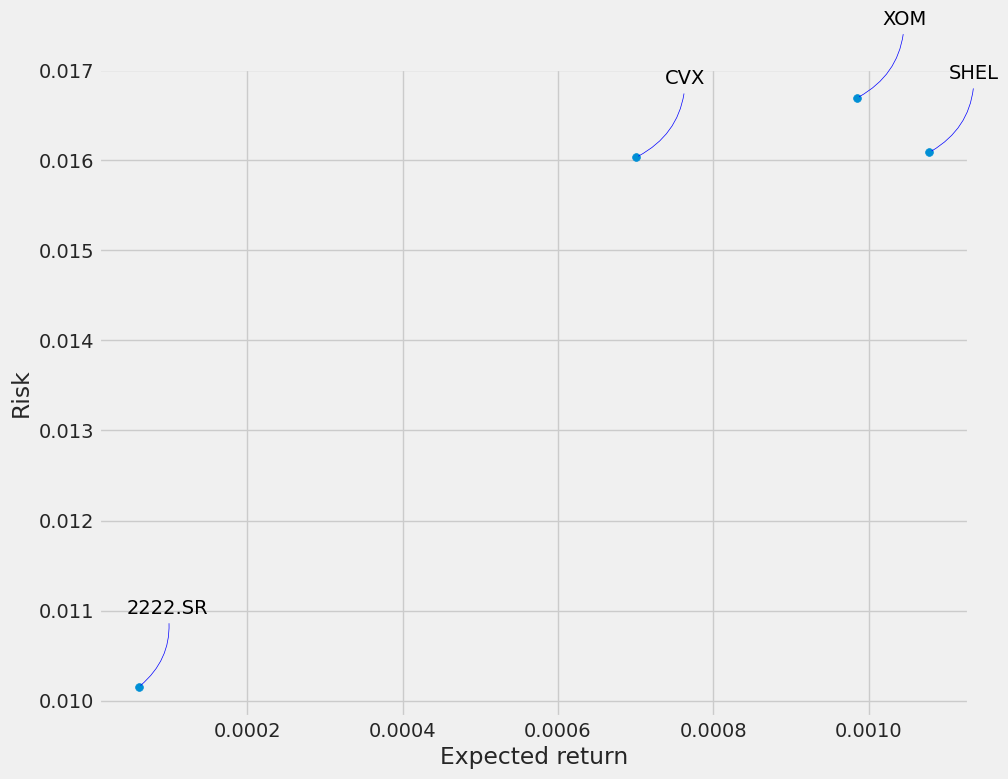

In [39]:
#Visualizing The Stock Expected Return VS Risk

returns = stock_returns.dropna()

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=np.pi * 10)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', color='black', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [40]:
# Get the stock data
df = pdr.get_data_yahoo('XOM', start='2012-01-01', end=datetime.now())
data = df.iloc[:, :6]
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,85.970001,86.669998,85.900002,86.000000,54.028175,20906800
2012-01-04,85.790001,86.150002,85.099998,86.019997,54.040722,16130900
2012-01-05,85.639999,85.949997,84.919998,85.760002,53.877392,17452800
2012-01-06,85.919998,86.000000,85.110001,85.120003,53.475323,15942100
2012-01-09,85.000000,85.639999,84.970001,85.500000,53.714054,11664200
...,...,...,...,...,...,...
2023-07-06,105.089996,105.720001,102.430000,102.919998,102.919998,17961400
2023-07-07,101.919998,104.000000,101.559998,103.160004,103.160004,21926600
2023-07-10,102.970001,104.750000,102.750000,104.690002,104.690002,14877600


In [41]:
# Create a new dataframe with only the 'Close column
# data = df.filter(['Close'])
data = df.iloc[:, :6]
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2755

In [42]:
dataset.shape

(2899, 6)

In [43]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.63213997, 0.62017362, 0.64333487, 0.62186503, 0.30435678,
        0.21083112],
       [0.63005446, 0.61423352, 0.63410975, 0.62209299, 0.30449468,
        0.15179396],
       [0.62831652, 0.6119488 , 0.6320341 , 0.61912908, 0.30269957,
        0.16813459],
       ...,
       [0.82910439, 0.82670781, 0.83763836, 0.83492936, 0.86116603,
        0.13630132],
       [0.85563667, 0.84281477, 0.86139294, 0.84952123, 0.87523412,
        0.10785633],
       [0.87579654, 0.85983554, 0.87667205, 0.85556317, 0.88105918,
        0.04097762]])

In [44]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0:6])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.63213997, 0.63005446, 0.62831652, 0.63156062, 0.62090139,
       0.63329856, 0.62205999, 0.61383384, 0.61116908, 0.629591  ,
       0.62437727, 0.63642678, 0.64500059, 0.64986675, 0.64500059,
       0.64140883, 0.6514888 , 0.63526819, 0.62402961, 0.61997448,
       0.6119801 , 0.61255936, 0.6120959 , 0.61939523, 0.62345036,
       0.63051791, 0.62472484, 0.60954693, 0.6132545 , 0.61418141,
       0.61927934, 0.61452898, 0.63329856, 0.63295099, 0.64221985,
       0.63920752, 0.64836058, 0.64581162, 0.64673853, 0.64928741,
       0.63793304, 0.64013443, 0.63445716, 0.63526819, 0.63260342,
       0.62090139, 0.62159653, 0.61510832, 0.63121305, 0.63932332,
       0.63121305, 0.63480473, 0.63341445, 0.63781715, 0.63932332,
       0.62646278, 0.62507241, 0.63457305, 0.64569573, 0.63665856])]
[array([0.62460896, 0.614005  , 0.63191885, 0.62277705, 0.30816222,
       0.11556001])]

[array([0.63213997, 0.63005446, 0.62831652, 0.63156062, 0.62090139,
       0.63329856, 0.62205999, 0.61

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(6))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
11/11 [==============================] - 10s 486ms/step - loss: 0.0921
Epoch 2/10
11/11 [==============================] - 6s 545ms/step - loss: 0.0127
Epoch 3/10
11/11 [==============================] - 5s 412ms/step - loss: 0.0070
Epoch 4/10
11/11 [==============================] - 4s 405ms/step - loss: 0.0055
Epoch 5/10
11/11 [==============================] - 6s 549ms/step - loss: 0.0047
Epoch 6/10
11/11 [==============================] - 5s 451ms/step - loss: 0.0043
Epoch 7/10
11/11 [==============================] - 10s 882ms/step - loss: 0.0041
Epoch 8/10
11/11 [==============================] - 5s 459ms/step - loss: 0.0040
Epoch 9/10
11/11 [==============================] - 6s 539ms/step - loss: 0.0039
Epoch 10/10
11/11 [==============================] - 5s 409ms/step - loss: 0.0038


In [46]:
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions.shape

5/5 [==============================] - 1s 45ms/step


(144, 6)

In [47]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 41ms/step


4636054.146568232

<ipython-input-48-d00661bd4e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:, i]
<ipython-input-48-d00661bd4e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:, i]
<ipython-input-48-d00661bd4e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

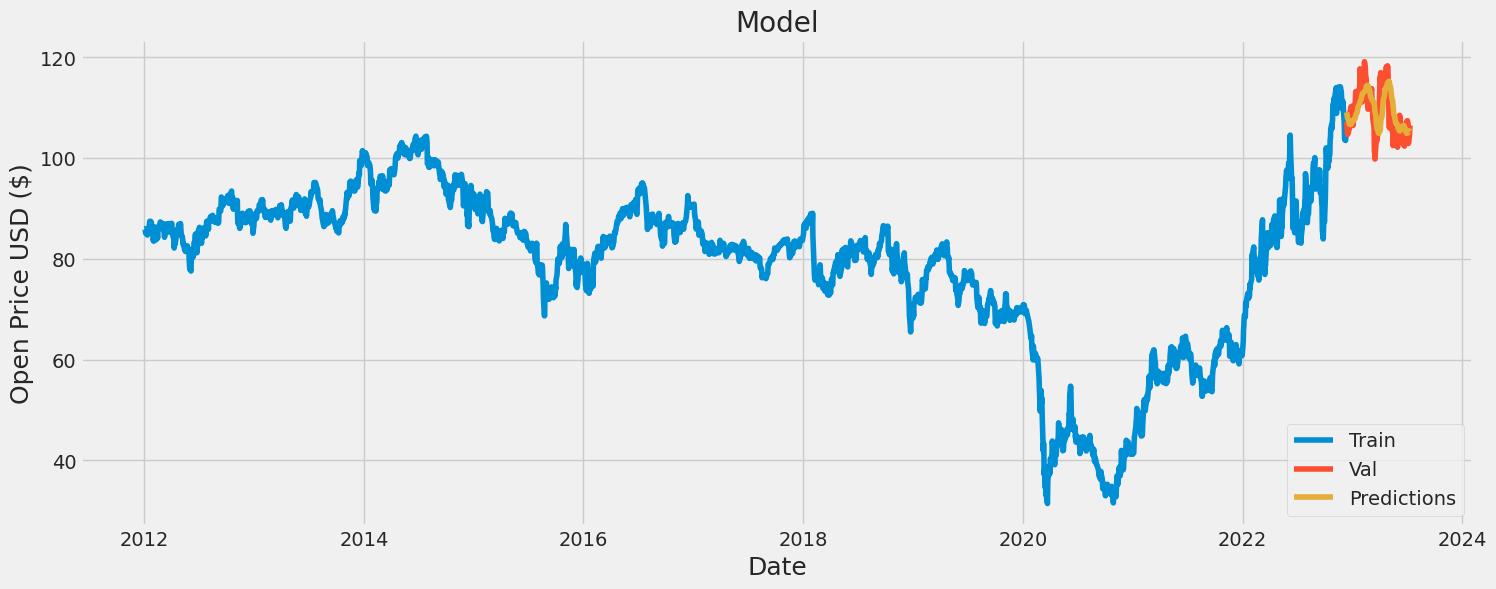

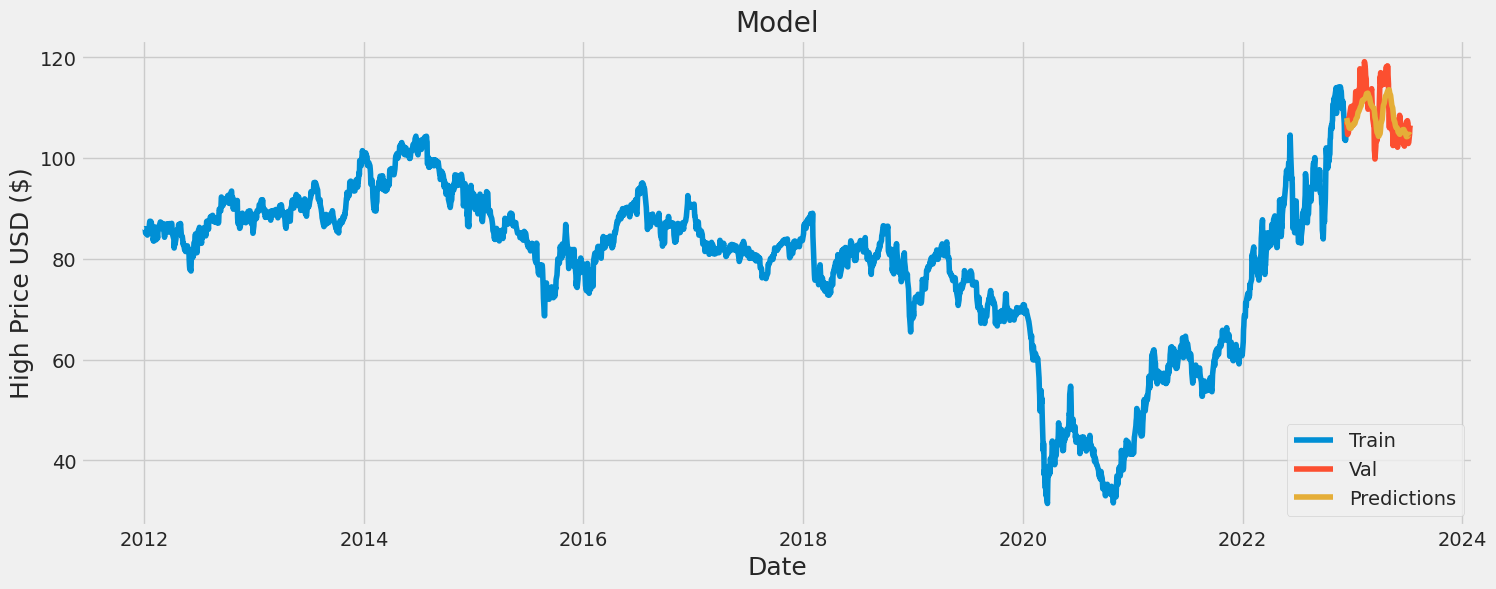

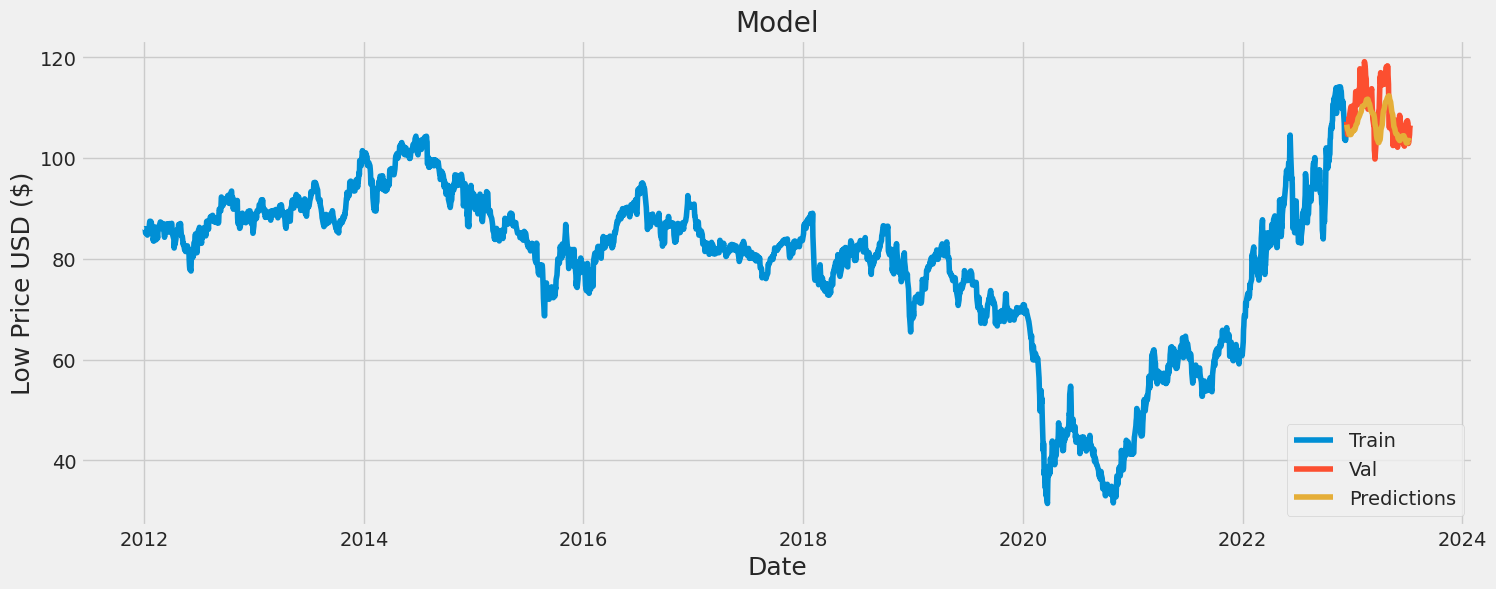

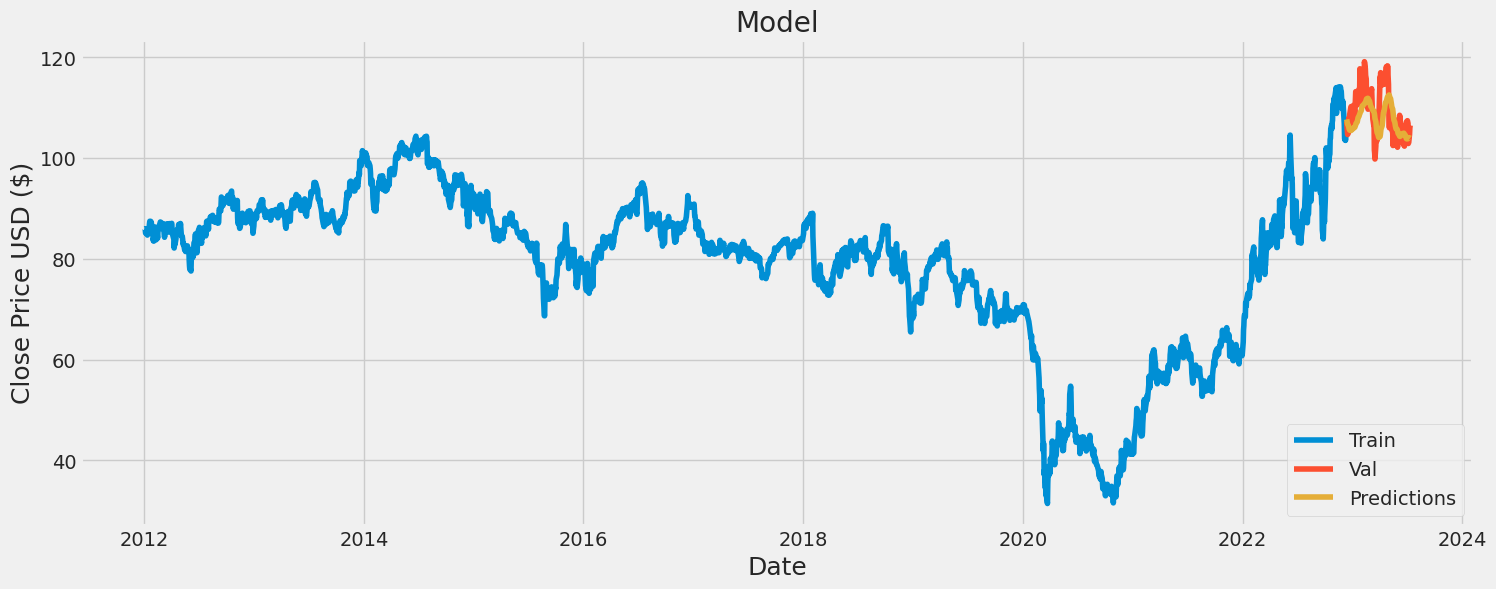

In [48]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
for i in range(4):
  valid['Predictions'] = predictions[:, i]
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(str(df.columns[i]) + ' Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-12-13,107.800003,108.540001,107.019997,107.250000,105.515427,24305300,107.714600
2022-12-14,107.989998,108.300003,105.750000,106.459999,104.738205,17597300,107.354530
2022-12-15,105.330002,106.169998,103.699997,105.440002,103.734703,15365100,107.059212
2022-12-16,103.690002,105.580002,103.129997,104.699997,103.006668,54596600,106.752487
2022-12-19,105.260002,106.199997,104.379997,105.169998,103.469063,13611100,106.416191
...,...,...,...,...,...,...,...
2023-07-06,105.089996,105.720001,102.430000,102.919998,102.919998,17961400,104.002724
2023-07-07,101.919998,104.000000,101.559998,103.160004,103.160004,21926600,104.083801
2023-07-10,102.970001,104.750000,102.750000,104.690002,104.690002,14877600,104.063744


In [58]:
si.get_live_price('CVX')

159.3000030517578

In [59]:
si.get_stats_valuation('CVX')

,0,1
0,Market Cap (intraday),295.60B
1,Enterprise Value,303.01B
2,Trailing P/E,8.54
3,Forward P/E,11.43
4,PEG Ratio (5 yr expected),NaN
5,Price/Sales (ttm),1.31
6,Price/Book (mrq),1.85
7,Enterprise Value/Revenue,1.30
8,Enterprise Value/EBITDA,4.50


In [56]:
si.get_undervalued_large_caps()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,ITUB,Itaú Unibanco Holding S.A.,5.85,0.02,+0.34%,11.019M,20.112M,57.329B,9.14,NaN
1,AAL,American Airlines Group Inc.,18.59,-0.21,-1.14%,14.641M,24.439M,12.285B,6.81,NaN
2,PBR,Petróleo Brasileiro S.A. - Petrobras,13.65,0.09,+0.63%,9.205M,21.743M,88.994B,2.51,NaN
3,UAL,"United Airlines Holdings, Inc.",55.58,-0.60,-1.07%,3.963M,6.705M,18.229B,9.62,NaN
4,VALE,Vale S.A.,13.99,0.27,+1.97%,11.475M,23.08M,61.563B,4.51,NaN
...,...,...,...,...,...,...,...,...,...,...
95,BWA,BorgWarner Inc.,46.22,0.65,+1.44%,977662,2.987M,11.018B,11.53,NaN
96,NWG,NatWest Group plc,6.36,0.25,+4.17%,1.327M,1.567M,28.457B,6.00,NaN
97,EC,Ecopetrol S.A.,10.77,0.18,+1.75%,1.114M,1.926M,22.152B,3.03,NaN
98,FOX,Fox Corporation,31.88,0.17,+0.55%,328753,1.286M,16.666B,14.96,NaN
